In [1]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

# train test split

In [5]:
x = df.drop("target",axis=1)
y = df["target"]

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=31,stratify=y)

# model building

In [7]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

# model evaluation

In [8]:
#testing data accuracy

y_pred = dt_model.predict(x_test)

cnf = confusion_matrix(y_test,y_pred)
print("confusion matrics:-\n",cnf)
print("*"*80)
accuracy = accuracy_score(y_test,y_pred)
print("accuracy:-",accuracy)
print("*"*80)
clf_rpt = classification_report(y_test,y_pred)
print("classification report:-\n",clf_rpt)

confusion matrics:-
 [[17 11]
 [ 7 26]]
********************************************************************************
accuracy:- 0.7049180327868853
********************************************************************************
classification report:-
               precision    recall  f1-score   support

           0       0.71      0.61      0.65        28
           1       0.70      0.79      0.74        33

    accuracy                           0.70        61
   macro avg       0.71      0.70      0.70        61
weighted avg       0.71      0.70      0.70        61



In [9]:
#testing data accuracy

y_pred = dt_model.predict(x_train)

cnf = confusion_matrix(y_train,y_pred)
print("confusion matrics:-\n",cnf)
print("*"*80)
accuracy = accuracy_score(y_train,y_pred)
print("accuracy:-",accuracy)
print("*"*80)
clf_rpt = classification_report(y_train,y_pred)
print("classification report:-\n",clf_rpt)

confusion matrics:-
 [[110   0]
 [  0 132]]
********************************************************************************
accuracy:- 1.0
********************************************************************************
classification report:-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       132

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



# plot decision tree

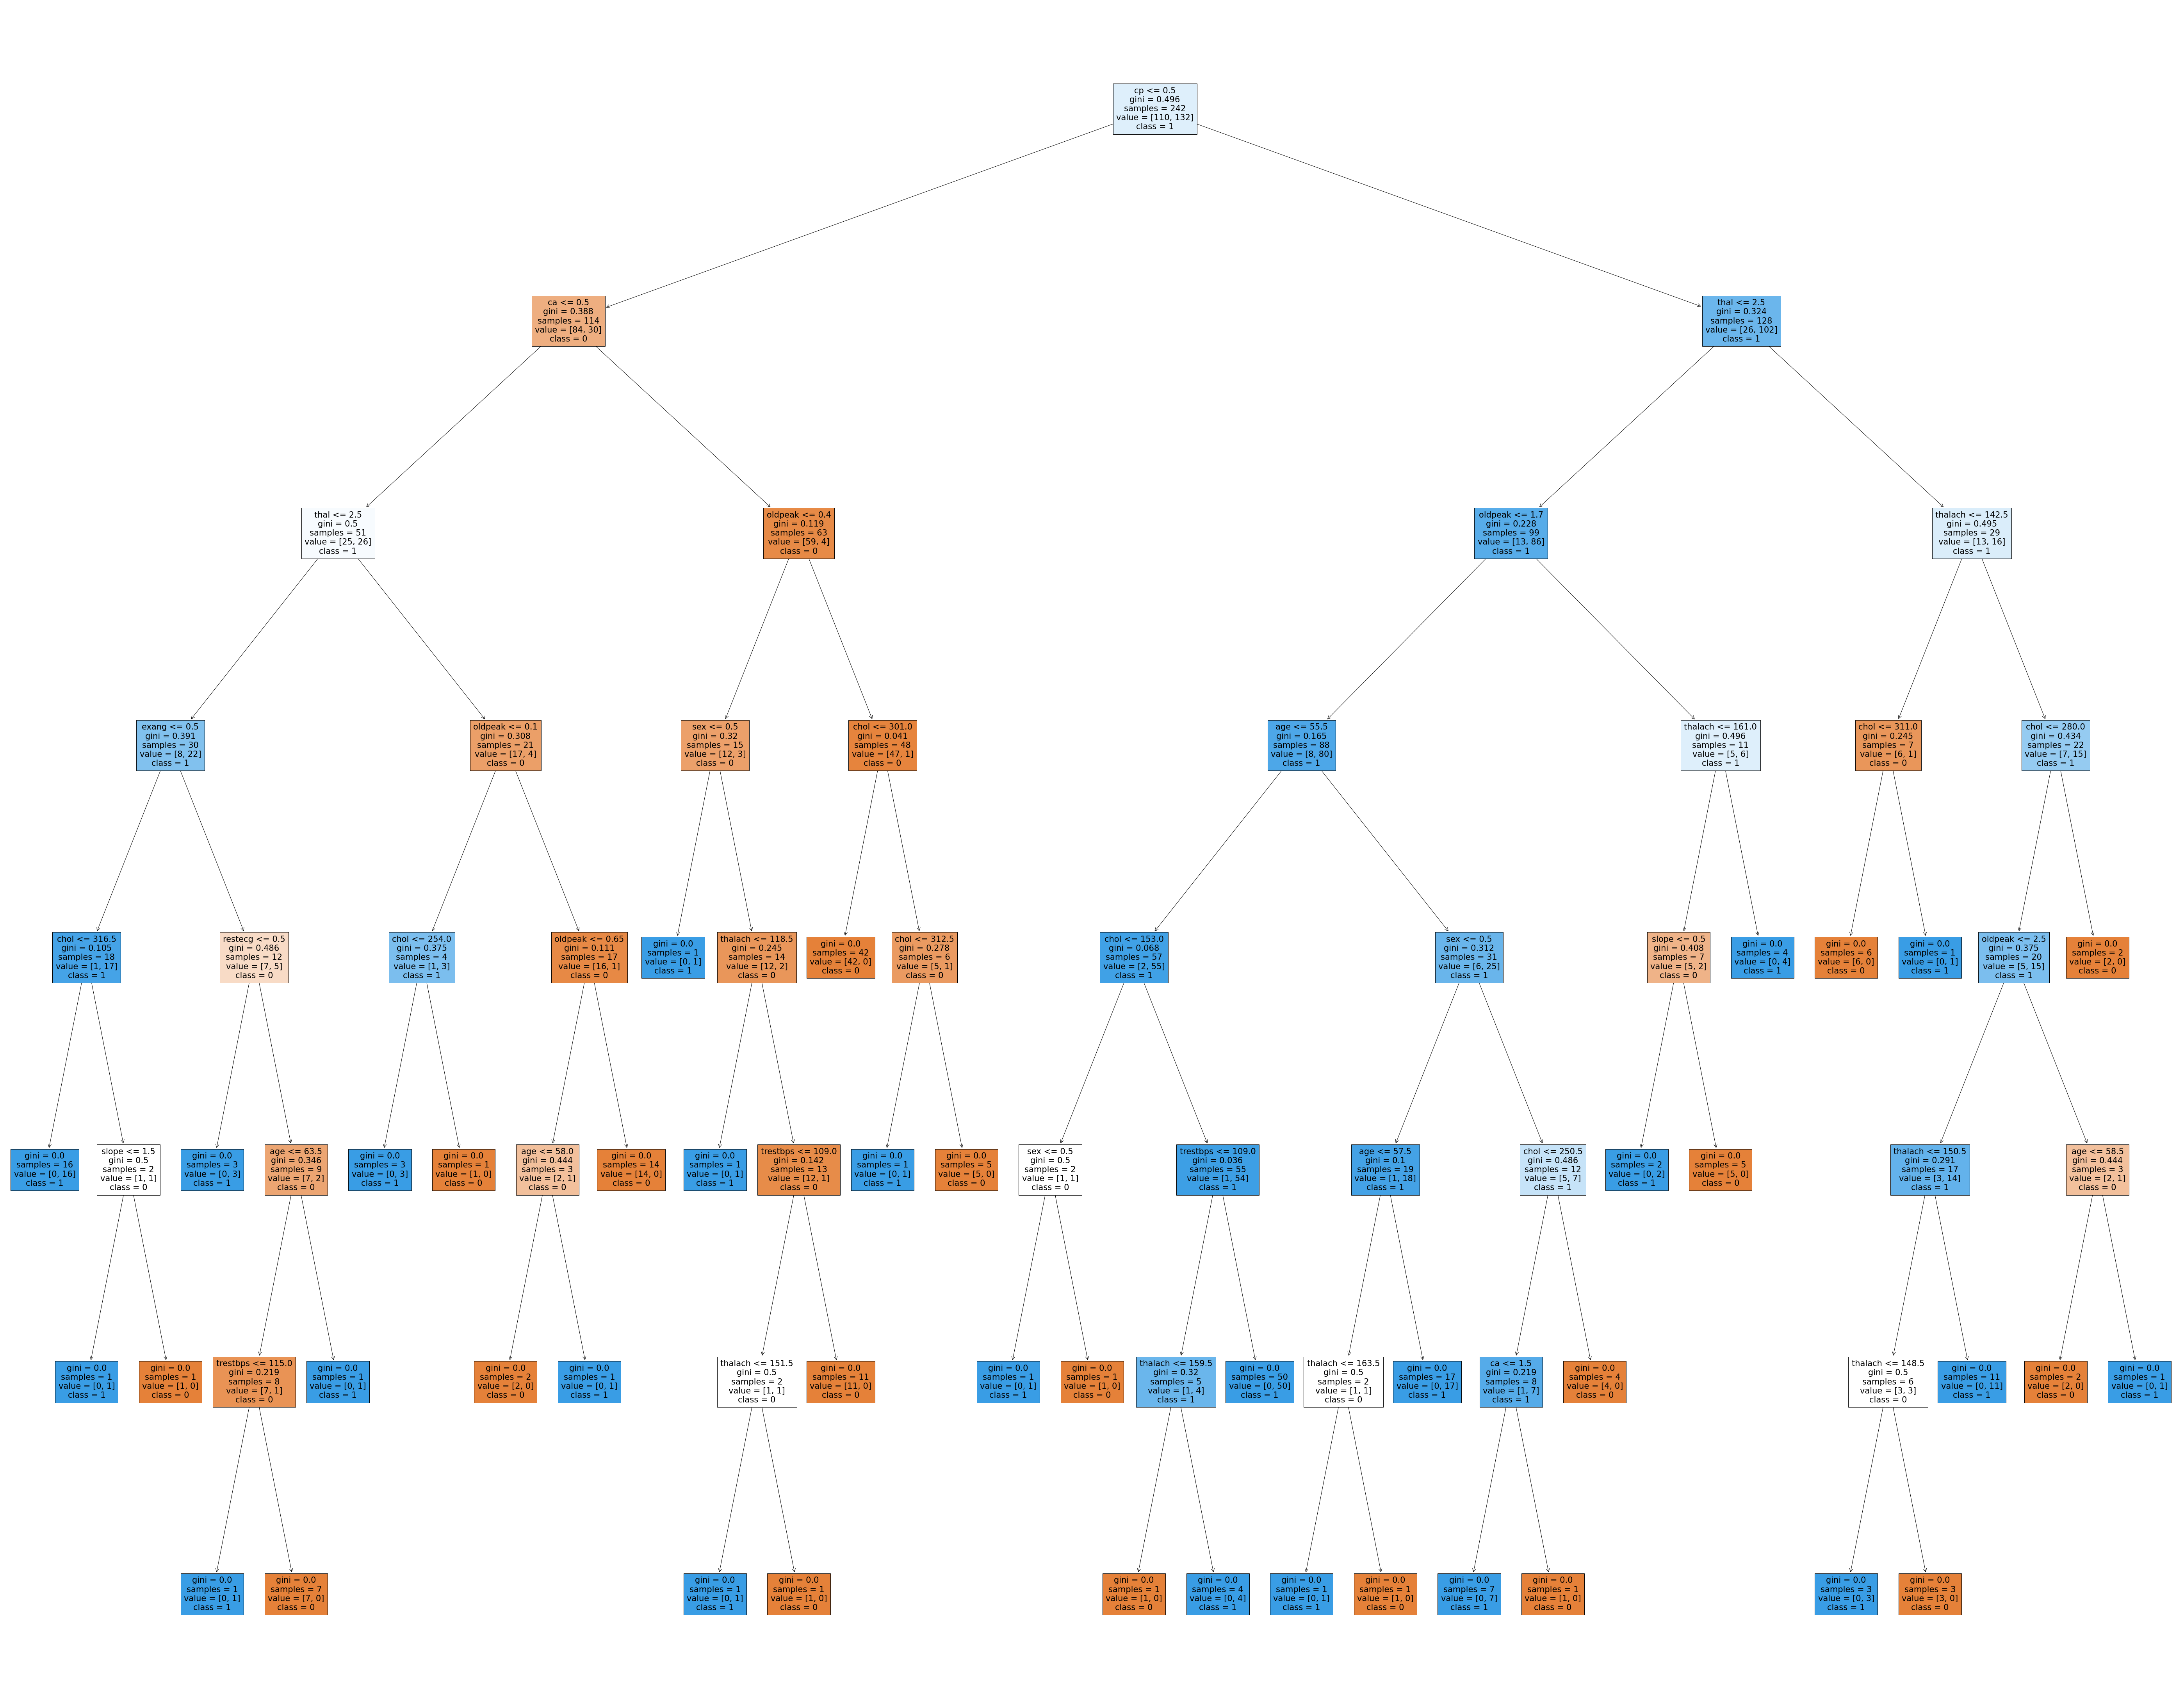

In [11]:
plt.figure(figsize=(100,80))
plot_tree(dt_model,feature_names=x.columns,class_names=["0","1"],filled=True)
print()

# hyperparameter tunning

In [12]:
dt_model = DecisionTreeClassifier()

hyperparameter = {"criterion":["gini","entropy"],
                 "max_depth":np.arange(3,8),
                 "min_samples_split":np.arange(2,20),
                 "min_samples_leaf":np.arange(2,30)}

gdcv = GridSearchCV(dt_model,hyperparameter,cv=5)
gdcv.fit(x_train,y_train)
gdcv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=16)

In [13]:
dt_model = gdcv.best_estimator_
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=16)

In [14]:
#testing data accuracy

y_pred = dt_model.predict(x_test)

cnf = confusion_matrix(y_test,y_pred)
print("confusion matrics:-\n",cnf)
print("*"*80)
accuracy = accuracy_score(y_test,y_pred)
print("accuracy:-",accuracy)
print("*"*80)
clf_rpt = classification_report(y_test,y_pred)
print("classification report:-\n",clf_rpt)

confusion matrics:-
 [[22  6]
 [ 6 27]]
********************************************************************************
accuracy:- 0.8032786885245902
********************************************************************************
classification report:-
               precision    recall  f1-score   support

           0       0.79      0.79      0.79        28
           1       0.82      0.82      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [15]:
#testing data accuracy

y_pred = dt_model.predict(x_train)

cnf = confusion_matrix(y_train,y_pred)
print("confusion matrics:-\n",cnf)
print("*"*80)
accuracy = accuracy_score(y_train,y_pred)
print("accuracy:-",accuracy)
print("*"*80)
clf_rpt = classification_report(y_train,y_pred)
print("classification report:-\n",clf_rpt)

confusion matrics:-
 [[ 91  19]
 [ 18 114]]
********************************************************************************
accuracy:- 0.8471074380165289
********************************************************************************
classification report:-
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       110
           1       0.86      0.86      0.86       132

    accuracy                           0.85       242
   macro avg       0.85      0.85      0.85       242
weighted avg       0.85      0.85      0.85       242



# Prunning

In [17]:
x = df.drop("target",axis=1)
y = df["target"]

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=31,stratify=y)

In [19]:
df_clf = DecisionTreeClassifier()
df_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [20]:
y_pred_test = df_clf.predict(x_test)

cnf_mat = confusion_matrix(y_test,y_pred_test)

print("confusion matrics:- \n",cnf_mat)

acc_score = accuracy_score(y_test,y_pred_test)

print("accurancy =", acc_score)

cls_rpt = classification_report(y_test,y_pred_test)

print("classification Report:- \n",cls_rpt)

confusion matrics:- 
 [[17 11]
 [ 6 27]]
accurancy = 0.7213114754098361
classification Report:- 
               precision    recall  f1-score   support

           0       0.74      0.61      0.67        28
           1       0.71      0.82      0.76        33

    accuracy                           0.72        61
   macro avg       0.72      0.71      0.71        61
weighted avg       0.72      0.72      0.72        61



In [21]:
y_pred_train = df_clf.predict(x_train)

cnf_mat = confusion_matrix(y_train,y_pred_train)

print("confusion matrics:- \n",cnf_mat)

acc_score = accuracy_score(y_train,y_pred_train)

print("accurancy =", acc_score)

cls_rpt = classification_report(y_train,y_pred_train)

print("classification Report:- \n",cls_rpt)

confusion matrics:- 
 [[110   0]
 [  0 132]]
accurancy = 1.0
classification Report:- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       132

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



In [22]:
result = df_clf.cost_complexity_pruning_path(x_train,y_train)
result

{'ccp_alphas': array([0.        , 0.00381437, 0.00388916, 0.00390266, 0.00391475,
        0.00398724, 0.00404614, 0.00507931, 0.00550964, 0.00619835,
        0.00642792, 0.00708383, 0.0072314 , 0.0084836 , 0.00969844,
        0.01107494, 0.01124885, 0.01274829, 0.01278445, 0.01657484,
        0.0186232 , 0.03008542, 0.0463978 , 0.1419503 ]),
 'impurities': array([0.        , 0.00762873, 0.01540705, 0.02321238, 0.03104187,
        0.04699083, 0.05508312, 0.07032104, 0.07583068, 0.08202903,
        0.09488486, 0.10196868, 0.10920009, 0.14313447, 0.1722298 ,
        0.20545461, 0.21670346, 0.22945176, 0.24223621, 0.25881105,
        0.27743425, 0.30751967, 0.35391746, 0.49586777])}

In [23]:
ccp_alpha_list = result["ccp_alphas"]
ccp_alpha_list

array([0.        , 0.00381437, 0.00388916, 0.00390266, 0.00391475,
       0.00398724, 0.00404614, 0.00507931, 0.00550964, 0.00619835,
       0.00642792, 0.00708383, 0.0072314 , 0.0084836 , 0.00969844,
       0.01107494, 0.01124885, 0.01274829, 0.01278445, 0.01657484,
       0.0186232 , 0.03008542, 0.0463978 , 0.1419503 ])

In [24]:
testing= []
training = []

for i in ccp_alpha_list:
    model = DecisionTreeClassifier(random_state=31,ccp_alpha=i)
    model.fit(x_train,y_train)
    
    testing_data = model.score(x_test,y_test)
    training_data = model.score(x_train,y_train)
    testing.append(testing_data)
    training.append(training_data)

In [25]:
np.where(testing==np.max(testing))

(array([19, 20], dtype=int64),)

In [26]:
ccp_alpha_list[19]

0.016574839302112024

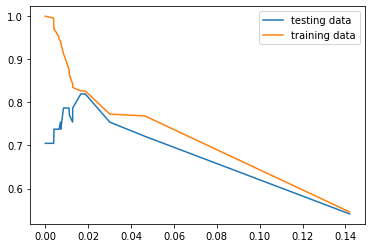

In [27]:
fig,ax=plt.subplots()

ax.plot(ccp_alpha_list,testing,label="testing data")
ax.plot(ccp_alpha_list,training,label="training data")
ax.legend()

In [28]:
df_clf = DecisionTreeClassifier(ccp_alpha=0.016574839302112024)
df_clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.016574839302112024)

In [29]:
y_pred_test = df_clf.predict(x_test)

cnf_mat = confusion_matrix(y_test,y_pred_test)

print("confusion matrics:- \n",cnf_mat)

acc_score = accuracy_score(y_test,y_pred_test)

print("accurancy =", acc_score)

cls_rpt = classification_report(y_test,y_pred_test)

print("classification Report:- \n",cls_rpt)

confusion matrics:- 
 [[19  9]
 [ 2 31]]
accurancy = 0.819672131147541
classification Report:- 
               precision    recall  f1-score   support

           0       0.90      0.68      0.78        28
           1       0.78      0.94      0.85        33

    accuracy                           0.82        61
   macro avg       0.84      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61



In [30]:
y_pred_train = df_clf.predict(x_train)

cnf_mat = confusion_matrix(y_train,y_pred_train)

print("confusion matrics:- \n",cnf_mat)

acc_score = accuracy_score(y_train,y_pred_train)

print("accurancy =", acc_score)

cls_rpt = classification_report(y_train,y_pred_train)

print("classification Report:- \n",cls_rpt)

confusion matrics:- 
 [[ 76  34]
 [  8 124]]
accurancy = 0.8264462809917356
classification Report:- 
               precision    recall  f1-score   support

           0       0.90      0.69      0.78       110
           1       0.78      0.94      0.86       132

    accuracy                           0.83       242
   macro avg       0.84      0.82      0.82       242
weighted avg       0.84      0.83      0.82       242

